In [1]:
import pm4py

def vis_write_ocel(scene:str, filter:bool, filter_timestamp:bool,process_instance:str, objects:list, min_timest:str, max_timest:str):
    ## scene: scene number
    ## filter: check if scene should be split in smaller cases
    ## process_instance: nai - New asset inventory / adtc - Asset disbursement to clients / ssaco - self-service asset check-out
    ## objects: objects which should be excluded to filter
    
    mov_log_ocel = pm4py.read_ocel_json(f'../dataProcessing/sceneMovOCEL/scene{scene}_mov.jsonocel')

    if filter == False:
        ### OCEL
        # Visualize
        ocel_vis = pm4py.ocel.discover_ocdfg(mov_log_ocel)
        pm4py.vis.view_ocdfg(ocel_vis)
        
        print(mov_log_ocel)

        # Write
        # ocel_path = f'../dataProcessing/filteredMovOCEL/filtered_mov{scene}_{process_instance}'
        # pm4py.write_ocel_json(mov_log_ocel, ocel_path)
        
    else:
        ### OCEL
        # Visualize
        filtered_ocel = pm4py.filtering.filter_ocel_objects(mov_log_ocel, object_identifiers=objects, positive=False, level=2)
        
        if filter_timestamp == True:
            filtered_ocel_timestamp = pm4py.filtering.filter_ocel_events_timestamp(filtered_ocel, min_timest=min_timest, max_timest=max_timest, timestamp_key='ocel:timestamp')
            ocel_vis = pm4py.ocel.discover_ocdfg(filtered_ocel_timestamp)
            pm4py.vis.view_ocdfg(ocel_vis)
        
            print(filtered_ocel_timestamp)

            # Write
            # ocel_path = f'../dataProcessing/filteredMovOCEL/filtered_mov{scene}_{process_instance}'
            # pm4py.write_ocel_json(filtered_ocel,ocel_path)
        
        else:
            ocel_vis = pm4py.ocel.discover_ocdfg(filtered_ocel)
            pm4py.vis.view_ocdfg(ocel_vis)
        
            print(filtered_ocel)

            # Write
            # ocel_path = f'../dataProcessing/filteredMovOCEL/filtered_mov{scene}_{process_instance}'
            # pm4py.write_ocel_json(filtered_ocel,ocel_path)

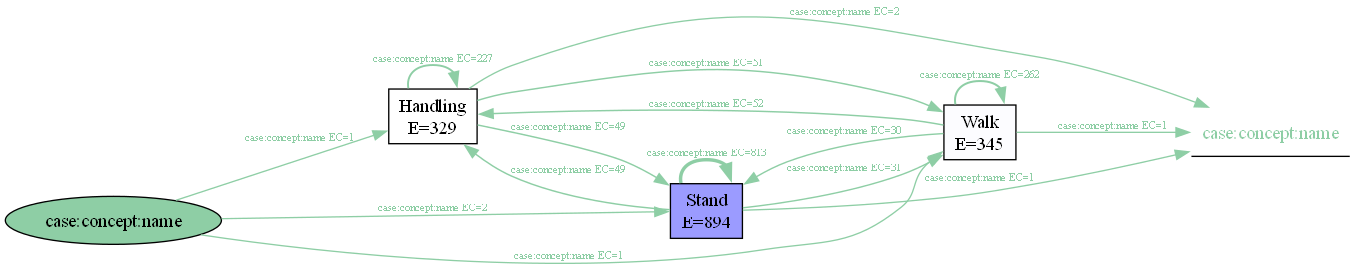

Object-Centric Event Log (number of events: 1568, number of objects: 4, number of activities: 3, number of object types: 1, events-objects relationships: 1568)
Activities occurrences: {'Stand': 894, 'Walk': 345, 'Handling': 329}
Object types occurrences (number of objects): {'case:concept:name': 4}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [2]:
vis_write_ocel(scene='01', filter=False, filter_timestamp=False, process_instance='adtc', objects=[], min_timest='', max_timest='')

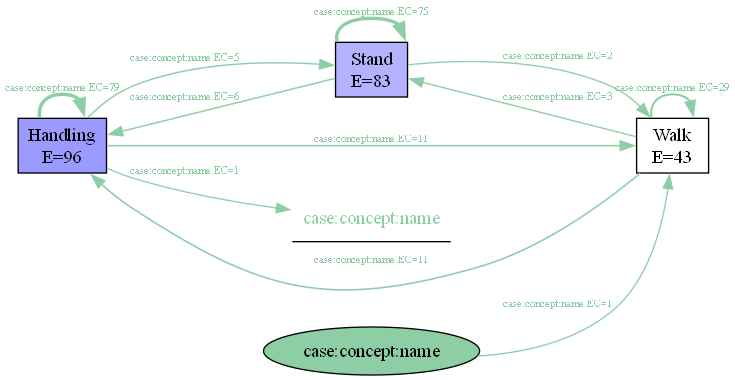

Object-Centric Event Log (number of events: 222, number of objects: 1, number of activities: 3, number of object types: 1, events-objects relationships: 222)
Activities occurrences: {'Handling': 96, 'Stand': 83, 'Walk': 43}
Object types occurrences (number of objects): {'case:concept:name': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [3]:
vis_write_ocel(scene='02', filter=False, filter_timestamp=False, process_instance='nai', objects=[], min_timest='', max_timest='')

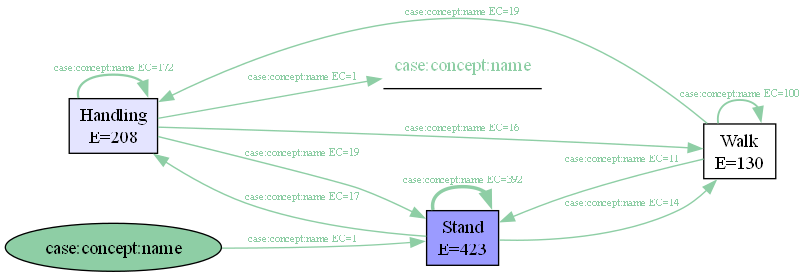

Object-Centric Event Log (number of events: 761, number of objects: 1, number of activities: 3, number of object types: 1, events-objects relationships: 761)
Activities occurrences: {'Stand': 423, 'Handling': 208, 'Walk': 130}
Object types occurrences (number of objects): {'case:concept:name': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [4]:
vis_write_ocel('03', True, False, 'nai', ['C1', 'C5', 'C6'],'','')

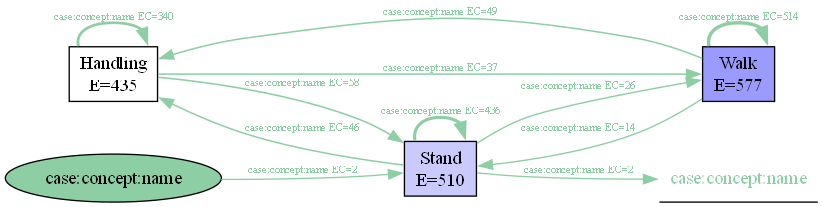

Object-Centric Event Log (number of events: 1522, number of objects: 2, number of activities: 3, number of object types: 1, events-objects relationships: 1522)
Activities occurrences: {'Walk': 577, 'Stand': 510, 'Handling': 435}
Object types occurrences (number of objects): {'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [5]:
vis_write_ocel('03', True, False, 'ssaco', ['C1', 'A1'], '','')

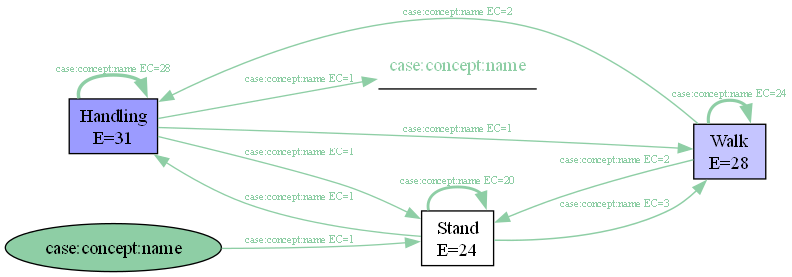

Object-Centric Event Log (number of events: 83, number of objects: 1, number of activities: 3, number of object types: 1, events-objects relationships: 83)
Activities occurrences: {'Handling': 31, 'Walk': 28, 'Stand': 24}
Object types occurrences (number of objects): {'case:concept:name': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [6]:
vis_write_ocel('04', True, True, 'nai', ['C2'],'2024-03-25 09:20:11','2024-03-25 09:21:33')

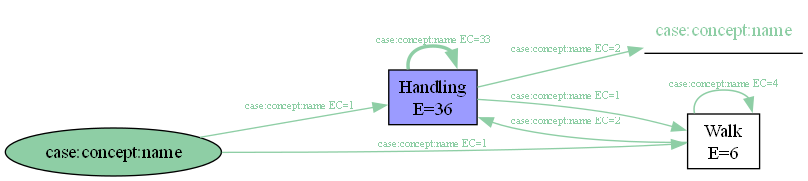

Object-Centric Event Log (number of events: 42, number of objects: 2, number of activities: 2, number of object types: 1, events-objects relationships: 42)
Activities occurrences: {'Handling': 36, 'Walk': 6}
Object types occurrences (number of objects): {'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [7]:
vis_write_ocel('05', True, True, 'ssaco', '', min_timest='2024-03-25 09:26:10', max_timest='2024-03-25 09:26:30')

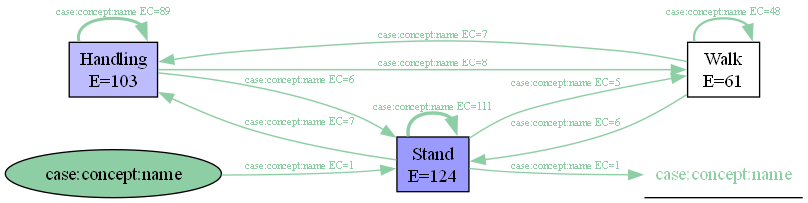

Object-Centric Event Log (number of events: 288, number of objects: 1, number of activities: 3, number of object types: 1, events-objects relationships: 288)
Activities occurrences: {'Stand': 124, 'Handling': 103, 'Walk': 61}
Object types occurrences (number of objects): {'case:concept:name': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [8]:
vis_write_ocel('06', True, True, 'nai', ['C10', 'C1', 'C9'], '2024-03-25 09:30:02', '2024-03-25 09:34:49')

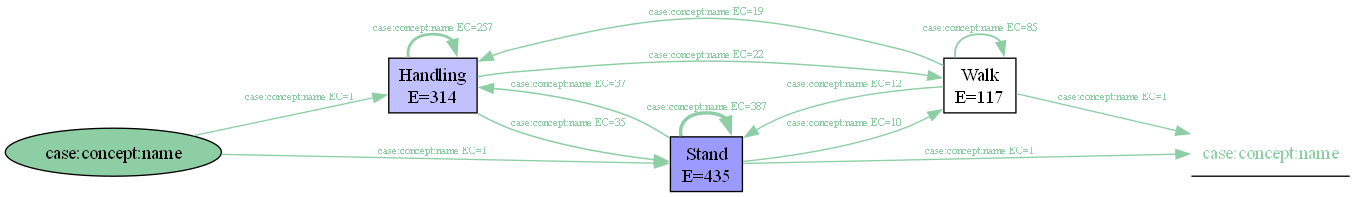

Object-Centric Event Log (number of events: 866, number of objects: 2, number of activities: 3, number of object types: 1, events-objects relationships: 866)
Activities occurrences: {'Stand': 435, 'Handling': 314, 'Walk': 117}
Object types occurrences (number of objects): {'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [9]:
vis_write_ocel('06', True, False, 'ssaco', ['C1', 'A1'], '', '')

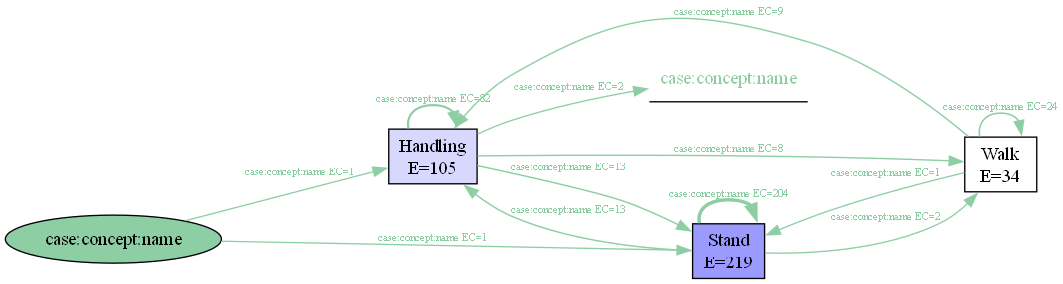

Object-Centric Event Log (number of events: 358, number of objects: 2, number of activities: 3, number of object types: 1, events-objects relationships: 358)
Activities occurrences: {'Stand': 219, 'Handling': 105, 'Walk': 34}
Object types occurrences (number of objects): {'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [10]:
vis_write_ocel('07', True, True, 'nai', '', '2024-03-25 09:39:50', '2024-03-25 09:42:48')

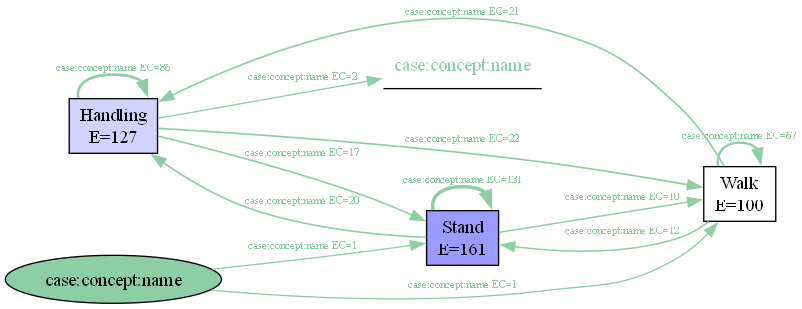

Object-Centric Event Log (number of events: 388, number of objects: 2, number of activities: 3, number of object types: 1, events-objects relationships: 388)
Activities occurrences: {'Stand': 161, 'Handling': 127, 'Walk': 100}
Object types occurrences (number of objects): {'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [11]:
vis_write_ocel('07', True, True, 'adtc', '', '2024-03-25 09:42:16', '2024-03-25 09:45:29') 

#### Exclude scene 8, because in which the process instances are not relevant to Thema 5

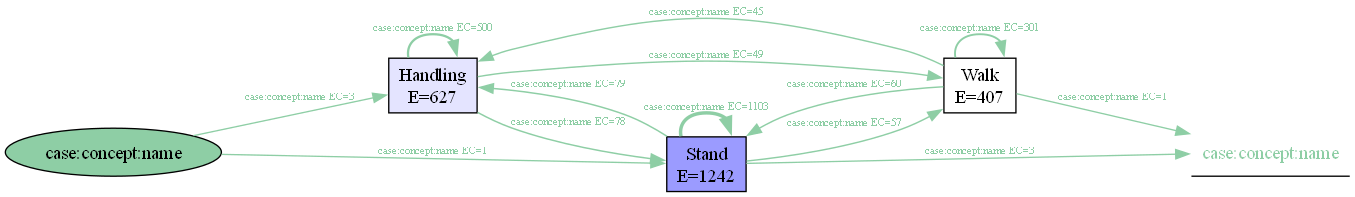

Object-Centric Event Log (number of events: 2276, number of objects: 4, number of activities: 3, number of object types: 1, events-objects relationships: 2276)
Activities occurrences: {'Stand': 1242, 'Handling': 627, 'Walk': 407}
Object types occurrences (number of objects): {'case:concept:name': 4}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [12]:
vis_write_ocel('09', False, False, 'adtc', [], '','')

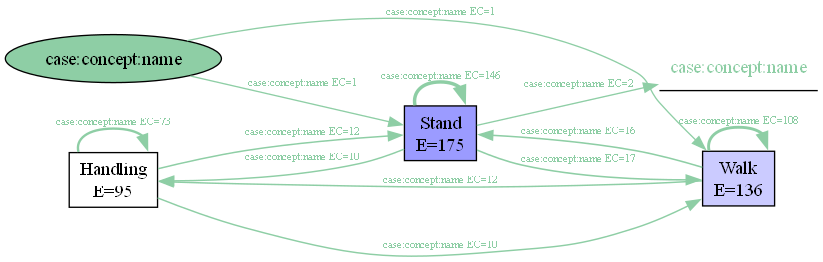

Object-Centric Event Log (number of events: 406, number of objects: 2, number of activities: 3, number of object types: 1, events-objects relationships: 406)
Activities occurrences: {'Stand': 175, 'Walk': 136, 'Handling': 95}
Object types occurrences (number of objects): {'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [13]:
vis_write_ocel('10', True, True, 'nai', '', min_timest='2024-03-25 10:58:14', max_timest='2024-03-25 11:01:36')

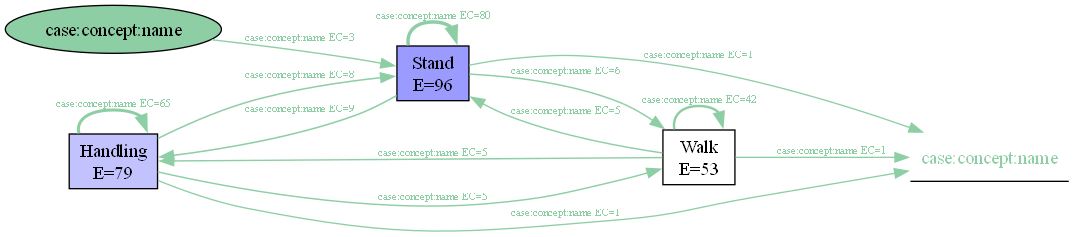

Object-Centric Event Log (number of events: 228, number of objects: 3, number of activities: 3, number of object types: 1, events-objects relationships: 228)
Activities occurrences: {'Stand': 96, 'Handling': 79, 'Walk': 53}
Object types occurrences (number of objects): {'case:concept:name': 3}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [14]:
vis_write_ocel('11', True, True, 'ssaco', '', '2024-03-25 11:13:37', '2024-03-25 11:14:52')

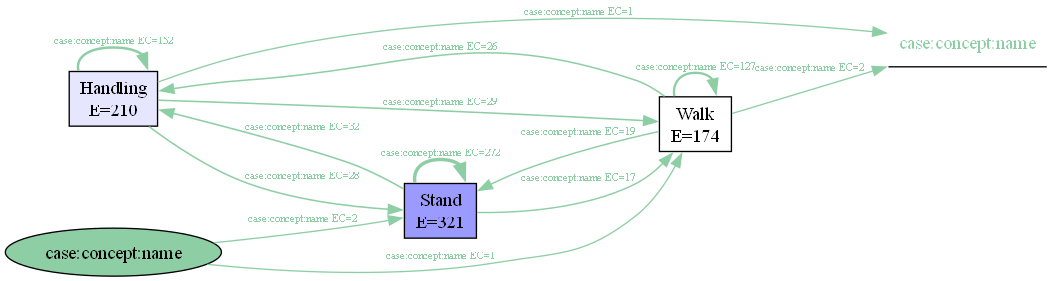

Object-Centric Event Log (number of events: 705, number of objects: 3, number of activities: 3, number of object types: 1, events-objects relationships: 705)
Activities occurrences: {'Stand': 321, 'Handling': 210, 'Walk': 174}
Object types occurrences (number of objects): {'case:concept:name': 3}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [15]:
vis_write_ocel('12', True, True, 'adtc', ['C3'], '2024-03-25 11:19:41', '2024-03-25 11:23:35')

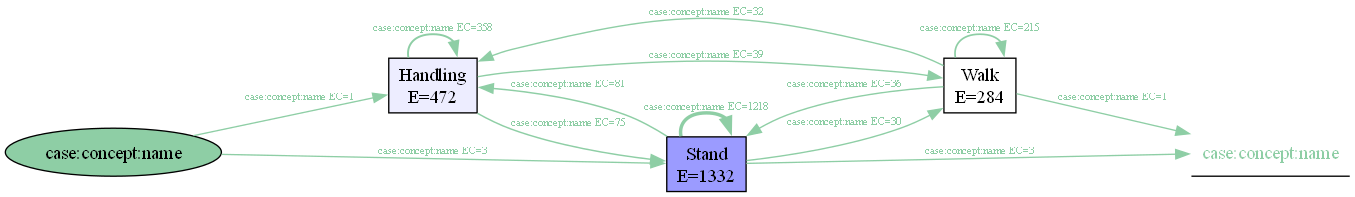

Object-Centric Event Log (number of events: 2088, number of objects: 4, number of activities: 3, number of object types: 1, events-objects relationships: 2088)
Activities occurrences: {'Stand': 1332, 'Handling': 472, 'Walk': 284}
Object types occurrences (number of objects): {'case:concept:name': 4}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [16]:
vis_write_ocel('13', True, True, 'adtc','', '2024-03-25 11:31:40', '2024-03-25 11:40:21')

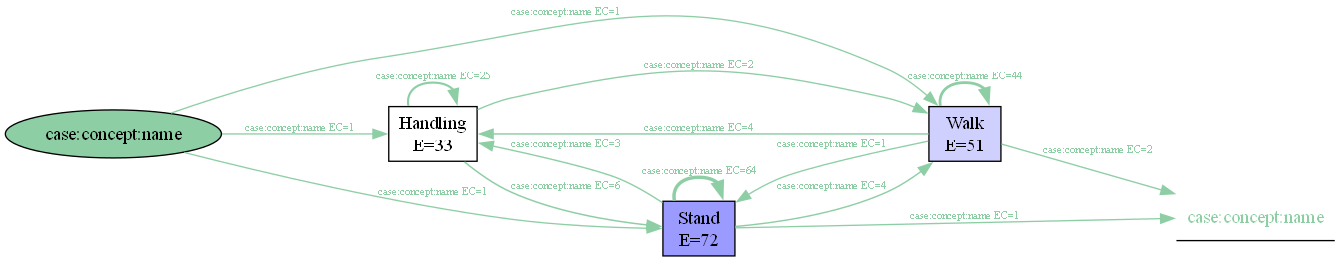

Object-Centric Event Log (number of events: 156, number of objects: 3, number of activities: 3, number of object types: 1, events-objects relationships: 156)
Activities occurrences: {'Stand': 72, 'Walk': 51, 'Handling': 33}
Object types occurrences (number of objects): {'case:concept:name': 3}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [17]:
vis_write_ocel('14', True, True,'ssaco', '', '2024-03-25 11:50:46', '2024-03-25 11:51:37')

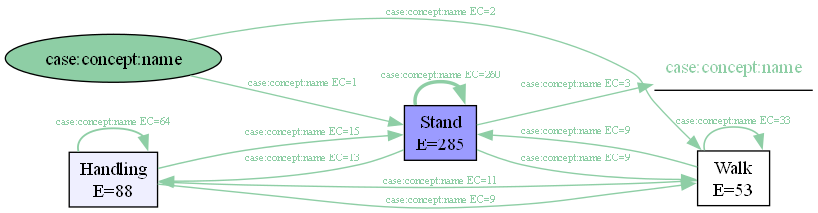

Object-Centric Event Log (number of events: 426, number of objects: 3, number of activities: 3, number of object types: 1, events-objects relationships: 426)
Activities occurrences: {'Stand': 285, 'Handling': 88, 'Walk': 53}
Object types occurrences (number of objects): {'case:concept:name': 3}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


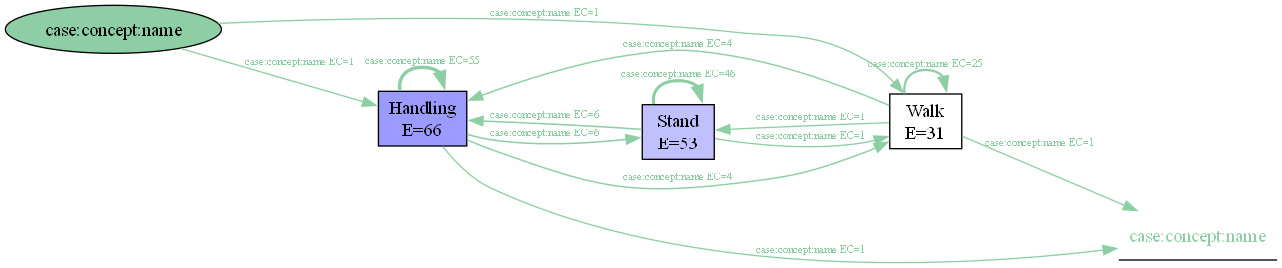

Object-Centric Event Log (number of events: 150, number of objects: 2, number of activities: 3, number of object types: 1, events-objects relationships: 150)
Activities occurrences: {'Handling': 66, 'Stand': 53, 'Walk': 31}
Object types occurrences (number of objects): {'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [18]:
vis_write_ocel('15', True, True, 'adtc1', ['C7'], '2024-03-25 11:55:47', '2024-03-25 11:58:08')
vis_write_ocel('15', True, True, 'adtc2', ['C7'], '2024-03-25 11:59:45', '2024-03-25 12:00:59')